
#Instalation
---




Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.



In [ ]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...

# sous Colab il faut déjà intégrer ces deux librairies

#!pip install umap-learn[plot]
#!pip install holoviews
#!pip install -U ipykernel

# eventuellement ne pas oublier de relancer le kernel du notebook

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
import random
from numpy import mean
from numpy import std


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
#from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import os
from os import listdir
from os.path import isfile, join
import cv2
import glob
import sys

Pour pouvoir sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [ ]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire Google Drive : 

In [ ]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/M2_ML_Projet'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/M2_ML_Projet


'/content/gdrive/My Drive/Colab Notebooks/M2_ML_Projet'

In [ ]:
def plot_curves(histories):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,top = 0.9, wspace = 0.25, hspace = 0)
  for i in range(len(histories)):
    # plot loss
    plt.subplot(121)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='red', label='test')  
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    # plot accuracy
    plt.subplot(122)
    plt.title('Classification Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='red',label='test')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
  plt.show()

In [ ]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,top = 0.9, wspace = 0.25, hspace = 0)

  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction

  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
  
  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top') 
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()

#Extraction de la dataset


##Récupération des jeux de données    

In [ ]:
!wget https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip

In [ ]:
import zipfile
with zipfile.ZipFile("Tiger-Fox-Elephant.zip","r") as zip_ref:
    zip_ref.extractall("Data_Project")

##Visualisation des images



Il y a trois jeux de données différents : des tigres, des éléphants et des renards. Pour chacun d'entre eux il y a un ensemble d'images positive et un ensemble d'images négatives. Par exemple dans le répertoire *tiger* il n'y a que des images de tigre et dans le répertoire *Tiger_negative_class* il n'y a que des images d'animaux qui ne correspondent pas à des tigres.   

Le code ci-dessous permet de visualiser quelques images contenues dans le répertoire *tiger*. 

In [ ]:
mypath='Data_Project/Tiger-Fox-Elephant/tiger'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )


COLUMNS = 25 # Nombre d'images à afficher

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)  
    plt.xlabel('taille ' + str(images[i].shape))

## Reshpe images

Nous pouvons constater que les images ne sont pas de la même taille. Il faut donc les convertir. Une manière simple de faire et de faire la conversion lors de la lecture des images : ici nous convertissons toutes les images en 124x124.

In [ ]:
IMG_SIZE=124
mypath='Data_Project/Tiger-Fox-Elephant/tiger'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )
  images[n]  = cv2.resize(images[n], (IMG_SIZE, IMG_SIZE))

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)  
    plt.xlabel('taille ' + str(images[i].shape))

#Création du jeu de données 


**Créer le jeu de données**   

Actuellement pour chaque animal nous avons un répertoire qui contient des images positives et un répertoire qui contient des images négatives. Pour pouvoir créer un jeu de données nous devons obtenir X et y. Les fonctions ci-dessous permettent de générer, à partir des répertoires, un jeu de données aléatoire pour X et y.

Définition de constante globale      


In [ ]:
# constantes globales
IMG_SIZE=124
COLUMNS = 25 # Nombre d'images à afficher

##Jeu d'entrainement / Jeu de validation

In [ ]:
def clean_data(train, test):
	# convertion d'entier en float
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalisation entre 0 et 1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

In [ ]:
def create_training_data(path_data, list_classes):
  training_data=[]
  for classes in list_classes:
      path=os.path.join(path_data, classes)
      class_num=list_classes.index(classes)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass  
  return training_data    

def create_X_y (path_data, list_classes):
      # récupération des données
      training_data=create_training_data(path_data, list_classes)
      # tri des données
      random.shuffle(training_data)
      # création de X et y
      X=[]
      y=[]
      for features, label in training_data:
        X.append(features)
        y.append(label)
      X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
      y=np.array(y)
      return X,y

def plot_examples(X,y):
  plt.figure(figsize=(15,15))
  for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(X[i]/255.,cmap=plt.cm.binary)
    plt.xlabel('classe ' + str(y[i]))

## Validation croisée

In [ ]:
# Evaluation avec un k-fold
def evaluate_model(model, dataX, dataY, n_folds=5, epochs=10):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# parcourir les splits du k-fold
	for train_ix, test_ix in kfold.split(dataX):
		# selection des données
		model = define_model()
		X_train, y_train, X_test, y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit du modele
		history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)
		# evaluate du modele
		loss, acc = model.evaluate(X_test, y_test, verbose=0)
		print('accuracy %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

##Evaluation et affichage des courbes et résultats

In [ ]:
# fonction pour charger, transformer et évaluer le modele
# elle lance n-folds fois l'évaluation et affiche les courbes et résultats
def run_evaluation(n_folds,epochs):
	# load dataset
	X_train, y_train, X_test, y_test = load_dataset()
	# Nettoyage et normalisation
	X_train, X_test = clean_data(X_train, X_test)
	# define model
	model = define_model()
	print (model.summary())
	# evaluate model
	scores, histories = evaluate_model(model, X_train, y_train, n_folds,epochs)
	plot_curves(histories)
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

## Modèle baseline

In [ ]:
# definition du premier modèle baseline
def define_model():
    model = Sequential()
    # Convolution and pooling
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(124, 124, 3), name="Conv2D_1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="Maxpooling2D_1"))
    
		# flatten
    model.add(Flatten(name="flatten") )
    
    # Partie classification 
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

##Tigres


In [ ]:
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['tiger','Tiger_negative_class']
X,y=create_X_y (my_path,my_classes)


# Surtout ne pas oublier de normaliser les données avec :
X=X.astype('float')
X=X/255.0


def load_dataset(X,y):
	# Chargement des données
	X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True)
	return X_train, y_train, X_test, y_test

def run_evaluation2(X,y,n_folds,epochs):
	# load dataset
	X_train, y_train, X_test, y_test = load_dataset(X,y)
	# Nettoyage et normalisation
	#X_train, X_test = clean_data(X_train, X_test)
	# define model
	model = define_model()
	print (model.summary())
	# evaluate model
	scores, histories = evaluate_model(model, X_train, y_train, n_folds,epochs)
	plot_curves(histories)
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 122, 122, 32)      896       
                                                                 
 Maxpooling2D_1 (MaxPooling2  (None, 61, 61, 32)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
 dense (Dense)               (None, 1)                 119073    
                                                                 
Total params: 119,969
Trainable params: 119,969
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
3/3 [==============================] - 8s 178ms/step - loss: 0.8239 - accuracy: 0.5054 - val_loss: 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



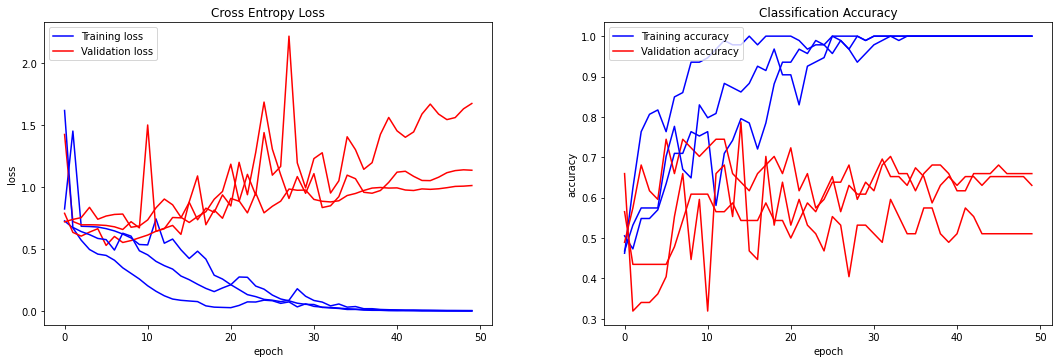

In [ ]:
n_folds=3
epochs=50
run_evaluation2(X,y,n_folds,epochs)

###Amélioration des résultats 


In [ ]:
def define_model():
  model = models.Sequential()   # pour initializer le modèle
  model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu', input_shape=(124, 124, 3),name="Conv2D_1"))
  model.add(MaxPooling2D(pool_size=(2, 2),name="Maxpooling2D_1")) # pour réduire l'échantillonnage

  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten(name="flatten1"))  #applatir la matrice de maxPooling
  model.add(layers.Dense(128,activation='relu'))
  model.add(layers.Dense(1,activation = 'sigmoid'))  #Couche de sortie 


  model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy']) #to finalise the model and make it completely ready to use.
  
  return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 122, 122, 32)      896       
                                                                 
 Maxpooling2D_1 (MaxPooling2  (None, 61, 61, 32)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 61, 61, 32)        0         
                                                                 
 flatten1 (Flatten)          (None, 119072)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               15241344  
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



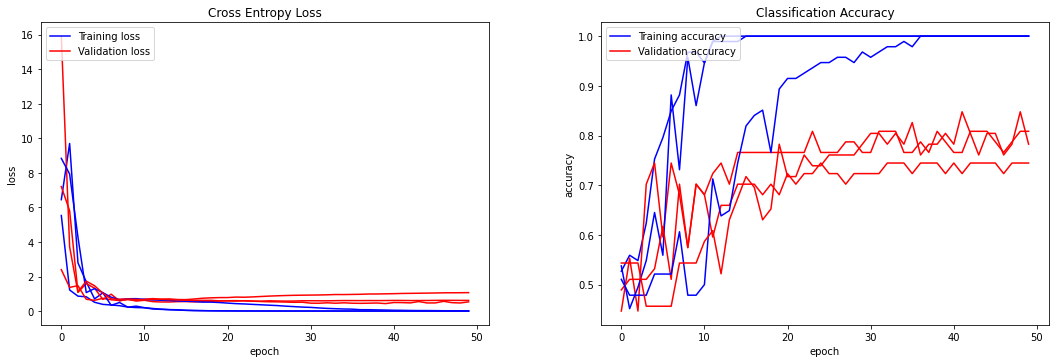

Accuracy: mean=77.860 std=2.621, n=3


In [ ]:
n_folds=3
epochs=50
run_evaluation2(X,y,n_folds,epochs)

###Augmentation des données

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=False,width_shift_range=0.2)

In [ ]:
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['tiger','Tiger_negative_class']
X,y=create_X_y (my_path,my_classes)

In [ ]:
X_train, y_train, X_test, y_test = load_dataset(X,y)
# nettoyage et normlisation des données
X_train, X_test = clean_data(X_train, X_test)combo ticket

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# configuration du batch size et récupération d'un batch d'images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # Affichage de 3x3
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(124,124), cmap=plt.get_cmap("gray"))
    plt.show()
    break

In [ ]:
run_evaluation2(X,y,n_folds,epochs)